# Практикум №3
# Абраменко Микити Олександровича, студента групи КА-01
# 1 варіант
## Реалізація багатошарового персептрона для класифікації зображень MNIST в TensorFlow з нуля

# Імпорт бібліотек, датасету, та його трансформація для подальшого використання

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
y = y.astype(int)
X = ((X / 255.) - .5) * 2 # нормалізація данних

X_train, X_test, y_train_not_encoded, y_test_not_encoded = train_test_split(
    X, y, test_size=10000, random_state=17, stratify=y)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


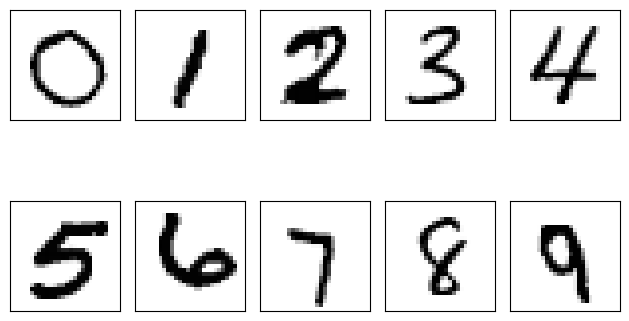

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train_not_encoded == i][:1].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [25]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0
mean,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.998555,-0.999226,-0.999608,-0.999853,-0.999902,-0.999984,-1.0,-1.0,-1.0,-1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.045943,0.033444,0.022961,0.013196,0.012205,0.002718,0.0,0.0,0.0,0.0
min,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
50%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
75%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
max,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.992157,0.992157,0.984314,0.984314,0.992157,-0.513725,-1.0,-1.0,-1.0,-1.0


OHE для лейблів 

In [26]:
OHE = OneHotEncoder(categories=[np.arange(10)])

y_train_encoded = OHE.fit_transform(y_train_not_encoded.reshape(-1, 1))
y_test_encoded = OHE.transform(y_test_not_encoded.reshape(-1, 1))

Порівняємо результат

In [27]:
y_train_not_encoded

array([0, 7, 3, ..., 8, 9, 8])

In [28]:
pd.DataFrame(y_train_encoded.toarray())

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
59996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Як ми можемо бачити, наш енкодінг спрацював правильно

In [29]:
X_train, X_test = tf.constant(X_train, dtype=tf.float32), tf.constant(X_test, dtype=tf.float32)
y_train, y_test = tf.constant(y_train_encoded.toarray(), dtype=tf.float32), tf.constant(y_test_encoded.toarray(), dtype=tf.float32)

# нейрона мережа без шарів

Почнемо зі створення кастомної функції втрат, перехресної ентропiї

In [30]:
def loss(target_y, predicted_y):
  return -tf.reduce_sum(tf.reduce_mean(target_y * tf.math.log(predicted_y + 1e-12), axis=0))

Сам класс:

In [31]:
class NoLayersModel(tf.Module):
  def __init__(self, in_features, out_features, name=None):
    super().__init__(name=name)
    self.w = tf.Variable(tf.random.normal([in_features, out_features]), name='w')
    self.b = tf.Variable(tf.random.normal([1]), name='b')

  def __call__(self, X):
    return tf.nn.softmax(tf.matmul(X, self.w) + self.b)

no_layer_model = NoLayersModel(X_train.shape[1], y_train.shape[1], name='no_layers')

Функція навчання

In [32]:
def train_nolayers(model, X, y, learning_rate):

  with tf.GradientTape() as tape:
    current_loss = loss(y, model(X))
  
  dw, db = tape.gradient(current_loss, [model.w, model.b])

  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

Наш цикл для навчання, одразу додамо функції навчання для наступних моделей, щоб не переписувати одне й те саме багато разів, також додамо можливість дострокового закінчення

In [72]:
def training_loop(model, X_train, y_train, layers, eps=1e-4, patience=50, lrng_rate=0.2, epochs=10000):

  i = 0

  loss_lst = []
  val_loss_lst = []
  acc_lst = []
  val_acc_lst = []

  for epoch in range(epochs):
    if layers == 0:
      train_nolayers(model, X_train, y_train, learning_rate=lrng_rate)
    elif layers == 1:
      train_hidden(model, X_train, y_train, learning_rate=lrng_rate)
    else:
      train_two_hidden(model, X_train, y_train, learning_rate=lrng_rate)

    acc_lst.append(accuracy_score(y_train_not_encoded, tf.argmax(model(X_train), axis=1)))
    val_acc_lst.append(accuracy_score(y_test_not_encoded, tf.argmax(model(X_test), axis=1)))

    train_loss = loss(y_train, model(X_train))
    val_loss = loss(y_test, model(X_test))

    loss_lst.append(train_loss)
    val_loss_lst.append(val_loss)

    if epoch % 100 == 0:
      print(f'Epoch {epoch}: Loss = {train_loss.numpy():.4f} Val Loss = {val_loss.numpy():.4f}, Val acc = {val_acc_lst[epoch]} \n')
    try:
      if np.abs(val_loss_lst[-2] - val_loss_lst[-1]) < eps:
        i += 1
    except: pass

    if i >= patience:
      print('validation loss is not improving, the loop is stopped')
      break

  return {'loss': loss_lst, 'val_loss': val_loss_lst, 'acc': acc_lst, 'val_acc': val_acc_lst}

In [34]:
print(f"Starting loss: {loss(y_train, no_layer_model(X_train)).numpy()}")

history_nolayer = training_loop(no_layer_model, X_train, y_train, layers=0)

Starting loss: 24.53654670715332
Epoch 0: Loss = 24.3750 Val Loss = 24.4078, Val acc = 0.0981 

Epoch 100: Loss = 6.8902 Val Loss = 7.1199, Val acc = 0.5315 

Epoch 200: Loss = 4.8499 Val Loss = 4.9901, Val acc = 0.6815 

Epoch 300: Loss = 4.4145 Val Loss = 4.5315, Val acc = 0.7173 

Epoch 400: Loss = 4.2039 Val Loss = 4.3069, Val acc = 0.7349 

Epoch 500: Loss = 4.0739 Val Loss = 4.1664, Val acc = 0.7457 

Epoch 600: Loss = 3.9826 Val Loss = 4.0668, Val acc = 0.7541 

Epoch 700: Loss = 3.9133 Val Loss = 3.9916, Val acc = 0.7594 

Epoch 800: Loss = 3.8583 Val Loss = 3.9326, Val acc = 0.7639 

Epoch 900: Loss = 3.8131 Val Loss = 3.8846, Val acc = 0.7677 

Epoch 1000: Loss = 3.7748 Val Loss = 3.8447, Val acc = 0.7711 

Epoch 1100: Loss = 3.7415 Val Loss = 3.8104, Val acc = 0.7739 

Epoch 1200: Loss = 3.7115 Val Loss = 3.7806, Val acc = 0.7753 

Epoch 1300: Loss = 1.4326 Val Loss = 1.5151, Val acc = 0.8069 

Epoch 1400: Loss = 1.1184 Val Loss = 1.1903, Val acc = 0.8439 

Epoch 1500: Loss 

Text(0.5, 1.0, 'Loss')

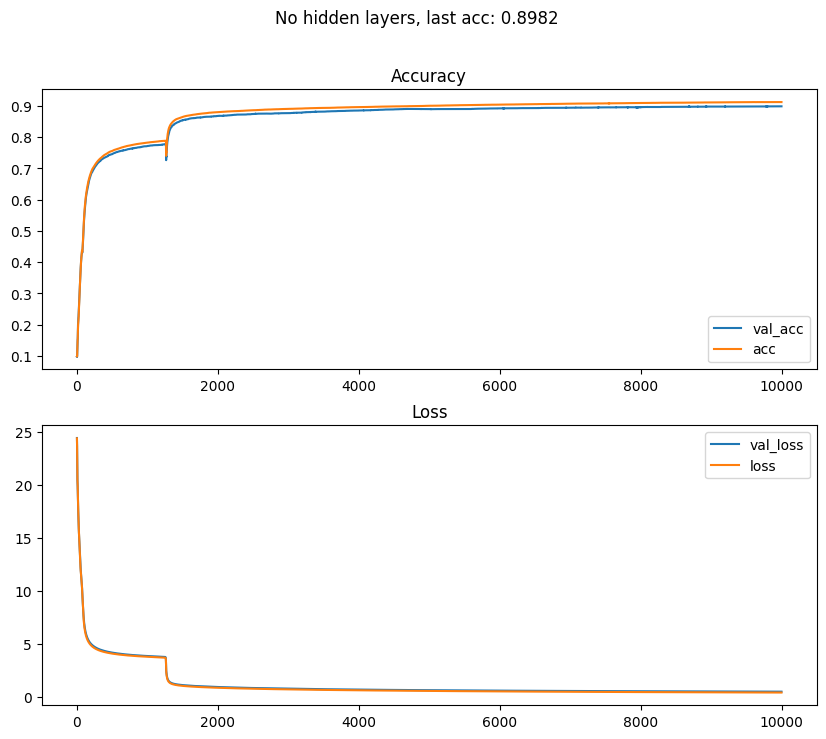

In [35]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle(f'No hidden layers, last acc: {history_nolayer["val_acc"][-1]}')

ax[0].plot(history_nolayer['val_acc'], label='val_acc')
ax[0].plot(history_nolayer['acc'], label='acc')
ax[0].legend()
ax[0].set_title('Accuracy')

ax[1].plot(history_nolayer['val_loss'], label='val_loss')
ax[1].plot(history_nolayer['loss'], label='loss')
ax[1].legend()
ax[1].set_title('Loss')

Як ми бачимо наша модель яка зовсім не мала скритих шарів показала себе дуже гарно, більше нічого додати, ми маємо дуже гладкий та гарний графік функції втрат та точності, не можна сказати, що модель почала перенавчатися, адже вона показує себе майже однаково добре і на тестовому датасеті і на тренувальному

# Моделі зі скритими шарами:

## Спробуємо спочатку з одним:

In [98]:
class HiddenModel(tf.Module):
  def __init__(self, in_features, out_features, name=None):
    super().__init__(name=name)
    self.w0 = tf.Variable(tf.random.normal([in_features, 50]), name='w0')
    self.b0 = tf.Variable(tf.random.normal([1]), name='b0')

    self.w1 = tf.Variable(tf.random.normal([50, 15]), name='w1')
    self.b1 = tf.Variable(tf.random.normal([1]), name='b1')

    self.w2 = tf.Variable(tf.random.normal([15, 10]), name='w2')
    self.b2 = tf.Variable(tf.random.normal([1]), name='b2')

  def __call__(self, x0):
    x1 = tf.nn.relu(tf.matmul(x0, self.w0) + self.b0)
    x2 = tf.nn.relu(tf.matmul(x1, self.w1) + self.b1)
    return tf.nn.softmax(tf.matmul(x2, self.w2) + self.b2)

hidden_model = HiddenModel(X_train.shape[1], y_train.shape[1], name='no_layers')

Також створимо для неї функції навчання, адже ми тепер повинні обновлювати більшу кількість параметрів, я вирішив не створювати одну функцію навчання для усіх моделей як це було з циклом, адже як на мене це було дуже складно

In [99]:
def train_hidden(model, X, y, learning_rate):

  with tf.GradientTape() as tape:
    current_loss = loss(y, model(X))

  dw2, dw1, dw0, db2, db1, db0 = tape.gradient(current_loss, [model.w2, model.w1, model.w0, model.b2, model.b1, model.b0])

  model.w2.assign_sub(learning_rate * dw2)
  model.b2.assign_sub(learning_rate * db2)

  model.w1.assign_sub(learning_rate * dw1)
  model.b1.assign_sub(learning_rate * db1)

  model.w0.assign_sub(learning_rate * dw0)
  model.b0.assign_sub(learning_rate * db0)

In [100]:
print(f"Starting loss: {loss(y_train, hidden_model(X_train)).numpy()}")

history_one_hid = training_loop(hidden_model, X_train, y_train, layers=1)

Starting loss: 25.13172149658203
Epoch 0: Loss = 23.0920 Val Loss = 23.1568, Val acc = 0.1561 

Epoch 100: Loss = 14.7098 Val Loss = 14.7159, Val acc = 0.4633 

Epoch 200: Loss = 14.2516 Val Loss = 14.2929, Val acc = 0.4803 

Epoch 300: Loss = 14.0851 Val Loss = 14.1360, Val acc = 0.4854 

Epoch 400: Loss = 11.8109 Val Loss = 11.7612, Val acc = 0.5618 

Epoch 500: Loss = 10.2440 Val Loss = 10.3091, Val acc = 0.6202 

Epoch 600: Loss = 9.4626 Val Loss = 9.6626, Val acc = 0.6454 

Epoch 700: Loss = 9.3353 Val Loss = 9.5826, Val acc = 0.6482 

Epoch 800: Loss = 9.1944 Val Loss = 9.4321, Val acc = 0.6545 

Epoch 900: Loss = 9.1287 Val Loss = 9.3851, Val acc = 0.6558 

Epoch 1000: Loss = 9.2143 Val Loss = 9.4279, Val acc = 0.654 

Epoch 1100: Loss = 9.0609 Val Loss = 9.3225, Val acc = 0.6581 

Epoch 1200: Loss = 9.1174 Val Loss = 9.3488, Val acc = 0.6588 

Epoch 1300: Loss = 9.0536 Val Loss = 9.2880, Val acc = 0.6596 

Epoch 1400: Loss = 8.9377 Val Loss = 9.2205, Val acc = 0.6617 

Epoch 15

Text(0.5, 1.0, 'Loss')

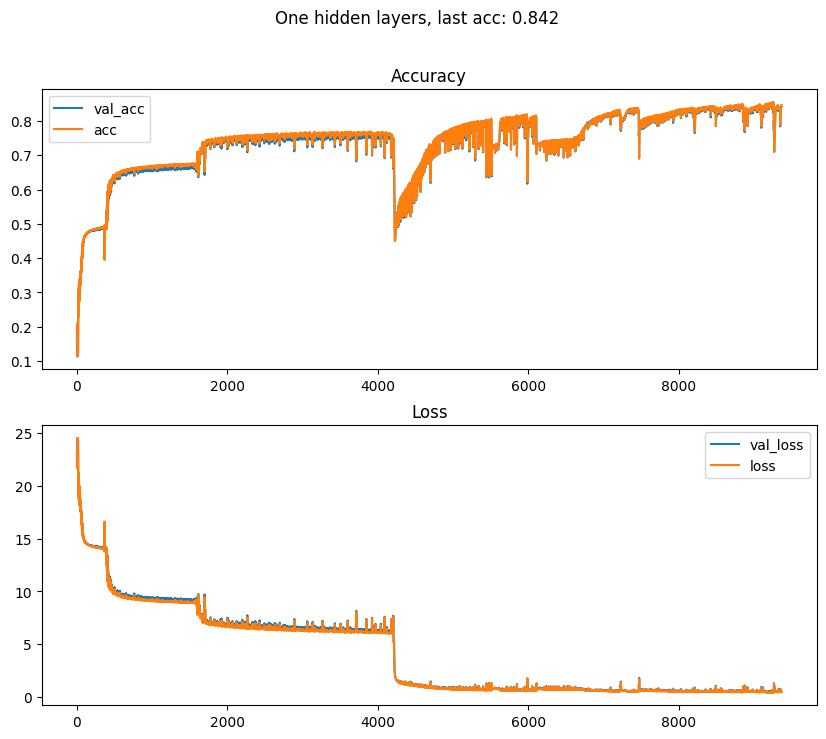

In [101]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle(f'One hidden layers, last acc: {history_one_hid["val_acc"][-1]}')

ax[0].plot(history_one_hid['val_acc'], label='val_acc')
ax[0].plot(history_one_hid['acc'], label='acc')
ax[0].legend()
ax[0].set_title('Accuracy')
 
ax[1].plot(history_one_hid['val_loss'], label='val_loss')
ax[1].plot(history_one_hid['loss'], label='loss')
ax[1].legend()
ax[1].set_title('Loss')

Ми бачимо як наші втрати та точність дуже скачуть, можливо це пов'язано з завеликим значенням швидкості навчання, але загалом модель себе показала непогано, хоча і не змогла показати себе краще ніж модель без шарів загалом. 

Також ми можемо помітити цікавий спад точності який як раз був у той самий момент коли ми отримали спад нашої функції втрат, що дуже цікаво, це показує нам те що маленьке значення крос ентропії не означає високе значення точності, хоч вона (точність) згодом вирівнялася

Модель не є ні перенавченою, ні недонавчаною

## Два шари:


In [110]:
class TwoLayersModel(tf.Module):
  def __init__(self, in_features, out_features, name=None):
    super().__init__(name=name)
    self.w0 = tf.Variable(tf.random.normal([in_features, 100]), name='w0')
    self.b0 = tf.Variable(tf.random.normal([1]), name='b0')

    self.w1 = tf.Variable(tf.random.normal([100, 50]), name='w1')
    self.b1 = tf.Variable(tf.random.normal([1]), name='b1')

    self.w2 = tf.Variable(tf.random.normal([50, 15]), name='w2')
    self.b2 = tf.Variable(tf.random.normal([1]), name='b2')

    self.w3 = tf.Variable(tf.random.normal([15, 10]), name='w3')
    self.b3 = tf.Variable(tf.random.normal([1]), name='b3')

  def __call__(self, x0):
    x1 = tf.nn.relu(tf.matmul(x0, self.w0) + self.b0)
    x2 = tf.nn.relu(tf.matmul(x1, self.w1) + self.b1)
    x3 = tf.nn.relu(tf.matmul(x2, self.w2) + self.b2)
    return tf.nn.softmax(tf.matmul(x3, self.w3) + self.b3)

two_layers_model = TwoLayersModel(X_train.shape[1], y_train.shape[1], name='no_layers')

In [111]:
def train_two_hidden(model, X, y, learning_rate):

  with tf.GradientTape() as tape:
    current_loss = loss(y, model(X))

  dw3, dw2, dw1, dw0, db3, db2, db1, db0 = tape.gradient(current_loss, [model.w3, model.w2, model.w1, model.w0, model.b3, model.b2, model.b1, model.b0])

  model.w3.assign_sub(learning_rate * dw3)
  model.b3.assign_sub(learning_rate * db3)

  model.w2.assign_sub(learning_rate * dw2)
  model.b2.assign_sub(learning_rate * db2)

  model.w1.assign_sub(learning_rate * dw1)
  model.b1.assign_sub(learning_rate * db1)

  model.w0.assign_sub(learning_rate * dw0)
  model.b0.assign_sub(learning_rate * db0)

In [112]:
print(f"Starting loss: {loss(y_train, two_layers_model(X_train)).numpy()}")

history_two_hid = training_loop(two_layers_model, X_train, y_train, layers=2)

Starting loss: 24.26010513305664
Epoch 0: Loss = 23.8570 Val Loss = 23.8198, Val acc = 0.1362 

Epoch 100: Loss = 12.3756 Val Loss = 12.4901, Val acc = 0.5461 

Epoch 200: Loss = 10.2912 Val Loss = 10.3775, Val acc = 0.6231 

Epoch 300: Loss = 9.7157 Val Loss = 9.8971, Val acc = 0.6409 

Epoch 400: Loss = 9.4485 Val Loss = 9.6628, Val acc = 0.6494 

Epoch 500: Loss = 8.4764 Val Loss = 8.6330, Val acc = 0.6859 

Epoch 600: Loss = 7.1005 Val Loss = 7.2495, Val acc = 0.7369 

Epoch 700: Loss = 6.9427 Val Loss = 7.1224, Val acc = 0.7415 

Epoch 800: Loss = 6.7671 Val Loss = 7.0024, Val acc = 0.7458 

Epoch 900: Loss = 6.6100 Val Loss = 6.8465, Val acc = 0.7515 

Epoch 1000: Loss = 6.6060 Val Loss = 6.8337, Val acc = 0.7519 

Epoch 1100: Loss = 6.4743 Val Loss = 6.7465, Val acc = 0.7554 

Epoch 1200: Loss = 6.4116 Val Loss = 6.7551, Val acc = 0.7551 

Epoch 1300: Loss = 6.3524 Val Loss = 6.6780, Val acc = 0.758 

Epoch 1400: Loss = 5.9564 Val Loss = 6.2626, Val acc = 0.7721 

Epoch 1500: Lo

Text(0.5, 1.0, 'Loss')

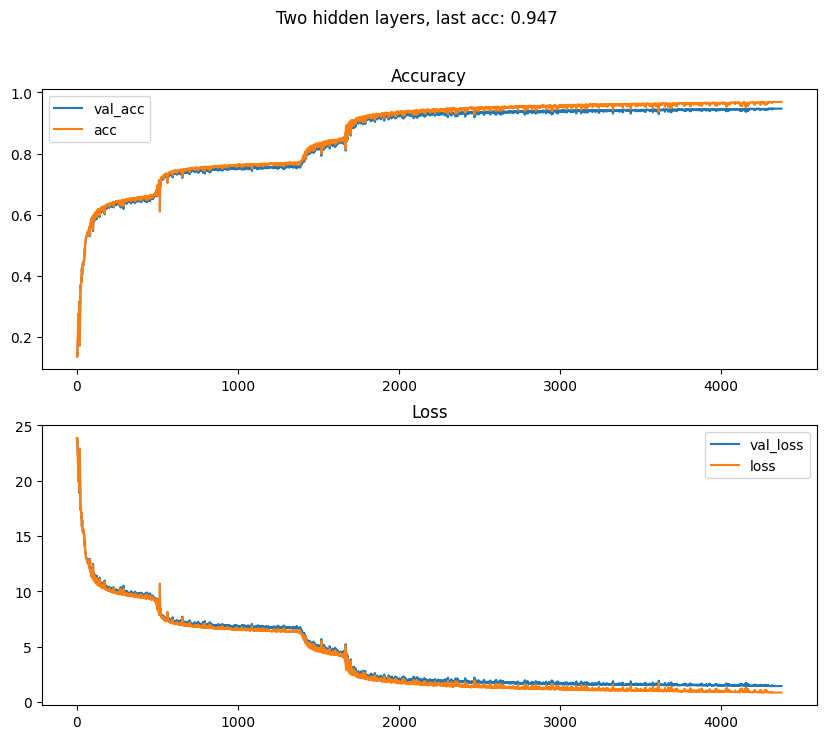

In [113]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle(f'Two hidden layers, last acc: {history_two_hid["val_acc"][-1]}')

ax[0].plot(history_two_hid['val_acc'], label='val_acc')
ax[0].plot(history_two_hid['acc'], label='acc')
ax[0].legend()
ax[0].set_title('Accuracy')

ax[1].plot(history_two_hid['val_loss'], label='val_loss')
ax[1].plot(history_two_hid['loss'], label='loss')
ax[1].legend()
ax[1].set_title('Loss')

Як ми бачимо це наша найкраща модель на данний момент і вона затребувала найменшу кількість епох, усього-то ~4400, загалом тут більше нічого сказати, ми бачимо як функція втрат та точність майже симметричні

Модель не є ні перенавченою, ні недонавчаною, можливо при більшій кількості епох модель би перенавчилася, ми можемо помітити, що точність на тренувальному датасеті почала рости, а на валідаційному залишалася така сама, саме у цей момент втрутилася дострокова зупинка

# Порівняння моделей:

Text(0.5, 1.0, 'Validation loss')

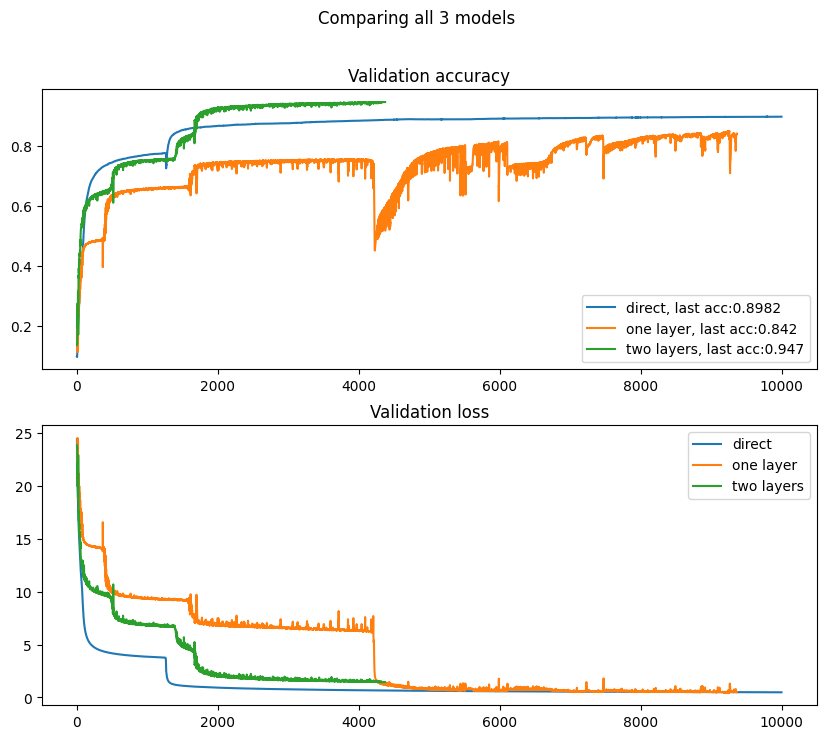

In [114]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle(f'Comparing all 3 models')

ax[0].plot(history_nolayer['val_acc'], label=f'direct, last acc:{history_nolayer["val_acc"][-1]}')
ax[0].plot(history_one_hid['val_acc'], label=f'one layer, last acc:{history_one_hid["val_acc"][-1]}')
ax[0].plot(history_two_hid['val_acc'], label=f'two layers, last acc:{history_two_hid["val_acc"][-1]}')
ax[0].legend()
ax[0].set_title('Validation accuracy')

ax[1].plot(history_nolayer['val_loss'], label='direct')
ax[1].plot(history_one_hid['val_loss'], label='one layer')
ax[1].plot(history_two_hid['val_loss'], label='two layers')
ax[1].legend()
ax[1].set_title('Validation loss')

Як ми бачимо найкраще себе показала двошарова, за нею йде без шарова модель і на останньому місці ми маємо одношарову модель, що досить не очікувано, адже зазвичай модель зі скритим шаром буде показувати себе краще ніж мережа прямого розповсюдження

Спробуємо підібрати швидкість навчання для одношарової моделі, адже на малюнку видно як часто та сильно стрибає її функція втрат, та точність

# інші значення швидкості навчання для одношарової моделі:

## 0.1


In [123]:
hidden_model = HiddenModel(X_train.shape[1], y_train.shape[1], name='no_layers')

print(f"Starting loss: {loss(y_train, hidden_model(X_train)).numpy()}")

history_one_hid_lrng_01 = training_loop(hidden_model, X_train, y_train, layers=1, lrng_rate=0.1)

Starting loss: 24.250329971313477
Epoch 0: Loss = 23.8717 Val Loss = 23.8449, Val acc = 0.1277 

Epoch 100: Loss = 15.7286 Val Loss = 15.9121, Val acc = 0.4165 

Epoch 200: Loss = 14.6016 Val Loss = 14.6713, Val acc = 0.464 

Epoch 300: Loss = 12.7260 Val Loss = 12.8404, Val acc = 0.5295 

Epoch 400: Loss = 11.1851 Val Loss = 11.3343, Val acc = 0.5793 

Epoch 500: Loss = 10.1741 Val Loss = 10.3887, Val acc = 0.6162 

Epoch 600: Loss = 9.8262 Val Loss = 10.0676, Val acc = 0.6282 

Epoch 700: Loss = 8.7158 Val Loss = 8.8894, Val acc = 0.6676 

Epoch 800: Loss = 7.3986 Val Loss = 7.6026, Val acc = 0.7125 

Epoch 900: Loss = 6.1264 Val Loss = 6.3017, Val acc = 0.7577 

Epoch 1000: Loss = 5.3758 Val Loss = 5.6198, Val acc = 0.787 

Epoch 1100: Loss = 5.3560 Val Loss = 5.5349, Val acc = 0.7889 

Epoch 1200: Loss = 5.0550 Val Loss = 5.2934, Val acc = 0.7986 

Epoch 1300: Loss = 4.8995 Val Loss = 5.0934, Val acc = 0.8051 

Epoch 1400: Loss = 5.5148 Val Loss = 5.5924, Val acc = 0.7837 

Epoch 1

Text(0.5, 1.0, 'Loss')

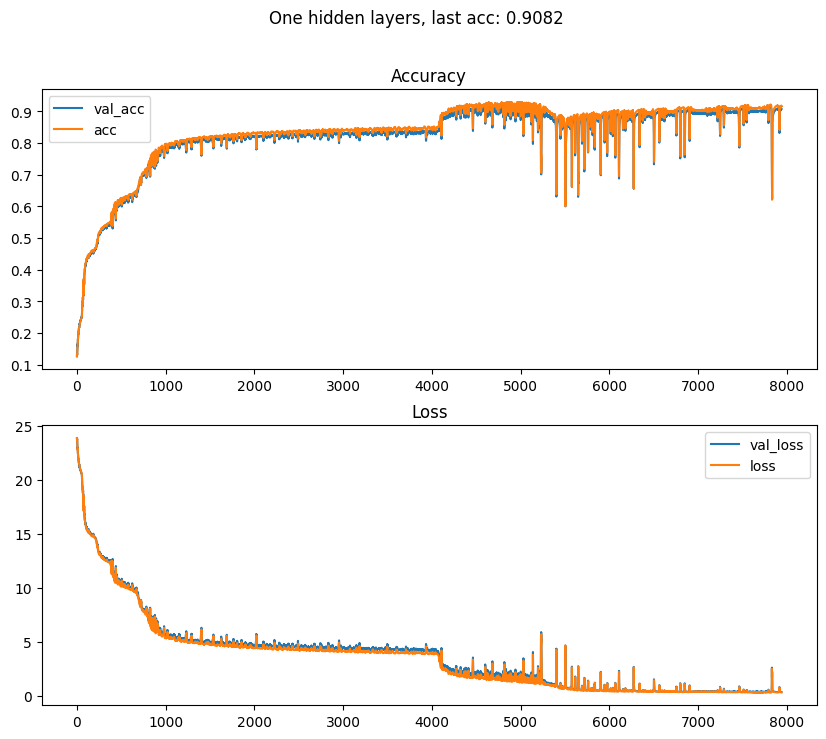

In [127]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle(f'One hidden layers, last acc: {history_one_hid_lrng_01["val_acc"][-1]}')

ax[0].plot(history_one_hid_lrng_01['val_acc'], label='val_acc')
ax[0].plot(history_one_hid_lrng_01['acc'], label='acc')
ax[0].legend()
ax[0].set_title('Accuracy')
 
ax[1].plot(history_one_hid_lrng_01['val_loss'], label='val_loss')
ax[1].plot(history_one_hid_lrng_01['loss'], label='loss')
ax[1].legend()
ax[1].set_title('Loss')

Виглядає краще, ми отримали більше значення точності, тепер вона переганяє по точності безшарову модель, як ми можемо побачити в один момент наша точність була дуже високою, але функції втрат ще було куди себе мінімізувати, тому навчання продовжилося, нажаль для такої ситуація я не достатньо модифікував цикл навчання та самі моделі, потрібно було б зробити для них точки збереження, але усе ж таки на мою думку, для моделі також важливо мати високе значення впевненості у своїх класифікаціях, тому для мене модель усе рівно покращувалася незважаючи на те, що точність впала

Але давайте спробуємо ще зменшити швидкість навчання

## 0.05

In [137]:
hidden_model = HiddenModel(X_train.shape[1], y_train.shape[1], name='no_layers')

print(f"Starting loss: {loss(y_train, hidden_model(X_train)).numpy()}")

history_one_hid_lrng_005 = training_loop(hidden_model, X_train, y_train, layers=1, lrng_rate=0.05)

Starting loss: 1.6373991966247559
Epoch 0: Loss = 1.6398 Val Loss = 1.6352, Val acc = 0.3766 

Epoch 100: Loss = 1.6142 Val Loss = 1.6112, Val acc = 0.3835 

Epoch 200: Loss = 1.5919 Val Loss = 1.5908, Val acc = 0.3913 

Epoch 300: Loss = 1.5726 Val Loss = 1.5715, Val acc = 0.3955 

Epoch 400: Loss = 1.5612 Val Loss = 1.5604, Val acc = 0.401 

Epoch 500: Loss = 1.5485 Val Loss = 1.5471, Val acc = 0.4052 

Epoch 600: Loss = 1.5596 Val Loss = 1.5504, Val acc = 0.4096 

Epoch 700: Loss = 1.5274 Val Loss = 1.5214, Val acc = 0.414 

Epoch 800: Loss = 1.5128 Val Loss = 1.5140, Val acc = 0.4226 

Epoch 900: Loss = 1.5184 Val Loss = 1.5135, Val acc = 0.4331 

Epoch 1000: Loss = 1.4668 Val Loss = 1.4605, Val acc = 0.4453 

Epoch 1100: Loss = 1.4585 Val Loss = 1.4570, Val acc = 0.4623 

Epoch 1200: Loss = 1.5035 Val Loss = 1.4950, Val acc = 0.4831 

Epoch 1300: Loss = 1.3857 Val Loss = 1.3815, Val acc = 0.4982 

Epoch 1400: Loss = 1.3002 Val Loss = 1.2956, Val acc = 0.5269 

Epoch 1500: Loss = 1

Text(0.5, 1.0, 'Loss')

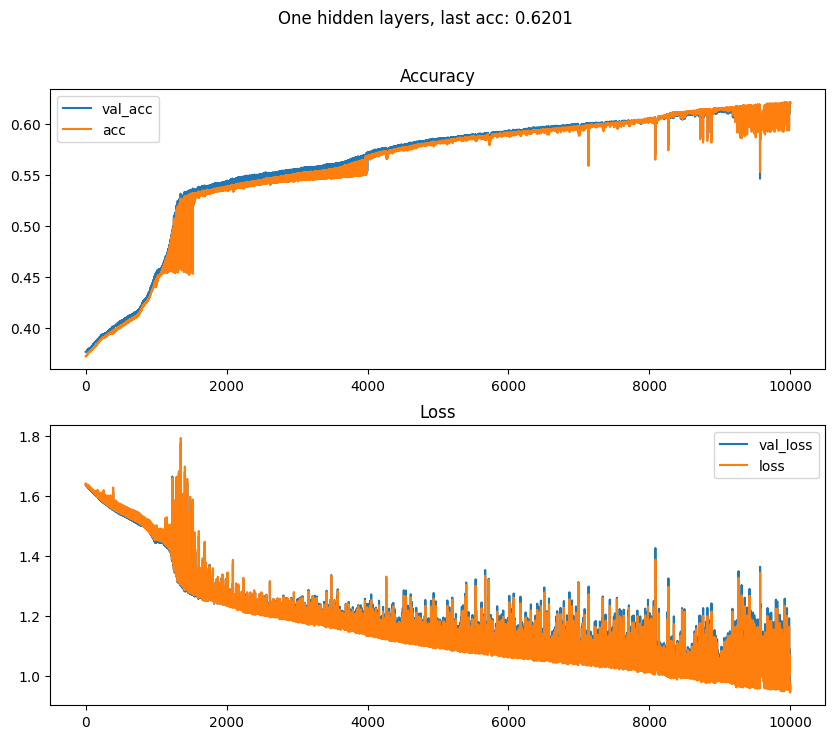

In [138]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle(f'One hidden layers, last acc: {history_one_hid_lrng_005["val_acc"][-1]}')

ax[0].plot(history_one_hid_lrng_005['val_acc'], label='val_acc')
ax[0].plot(history_one_hid_lrng_005['acc'], label='acc')
ax[0].legend()
ax[0].set_title('Accuracy')
 
ax[1].plot(history_one_hid_lrng_005['val_loss'], label='val_loss')
ax[1].plot(history_one_hid_lrng_005['loss'], label='loss')
ax[1].legend()
ax[1].set_title('Loss')

Як можна побачити ми не отримали кращих результатів, мабуть це значення швидкості навчння було замалим, більше мені тут нічого сказати, подальші експерименти я вважаю недоцільними, адже ми вже отримали досить непогану модель

# Порівняння різних функцій активації на двошаровій моделі

На усіх шарах функції активації будуть однакові, тобто комбінацій не буде, інакше це тоді буде дуже велике порівняння

Parametric LeakyReLU я не знайшов у модулі tf.nn, тому його у порівнянні не буде, хоча насправді можна було б його зробити через Optuna, підібрати значення alpha для Leaky ReLU, але я вирішив, що це не доцільно, моделі і так довго навчаються і я вважаю, що у нас наврядчи великою стоїть проблема "dying ReLU"

## LeakyReLU

In [143]:
class LeakyTwoLayersModel(tf.Module):
  def __init__(self, in_features, out_features, name=None):
    super().__init__(name=name)
    self.w0 = tf.Variable(tf.random.normal([in_features, 100]), name='w0')
    self.b0 = tf.Variable(tf.random.normal([1]), name='b0')

    self.w1 = tf.Variable(tf.random.normal([100, 50]), name='w1')
    self.b1 = tf.Variable(tf.random.normal([1]), name='b1')

    self.w2 = tf.Variable(tf.random.normal([50, 15]), name='w2')
    self.b2 = tf.Variable(tf.random.normal([1]), name='b2')

    self.w3 = tf.Variable(tf.random.normal([15, 10]), name='w3')
    self.b3 = tf.Variable(tf.random.normal([1]), name='b3')

  def __call__(self, x0):
    x1 = tf.nn.leaky_relu(tf.matmul(x0, self.w0) + self.b0)
    x2 = tf.nn.leaky_relu(tf.matmul(x1, self.w1) + self.b1)
    x3 = tf.nn.leaky_relu(tf.matmul(x2, self.w2) + self.b2)
    return tf.nn.softmax(tf.matmul(x3, self.w3) + self.b3)

In [144]:
%%time

leaky_model = LeakyTwoLayersModel(X_train.shape[1], y_train.shape[1], name='no_layers')

print(f"Starting loss: {loss(y_train, leaky_model(X_train)).numpy()}")

history_leaky = training_loop(leaky_model, X_train, y_train, layers=1, lrng_rate=0.1)

Starting loss: 24.505626678466797
Epoch 0: Loss = 23.9999 Val Loss = 23.9373, Val acc = 0.1318 

Epoch 100: Loss = 13.5406 Val Loss = 13.6159, Val acc = 0.5062 

Epoch 200: Loss = 12.7115 Val Loss = 12.8196, Val acc = 0.5349 

Epoch 300: Loss = 12.4090 Val Loss = 12.4890, Val acc = 0.5469 

Epoch 400: Loss = 12.2743 Val Loss = 12.4158, Val acc = 0.5502 

Epoch 500: Loss = 10.7852 Val Loss = 10.8062, Val acc = 0.6079 

Epoch 600: Loss = 10.0129 Val Loss = 10.0549, Val acc = 0.6346 

Epoch 700: Loss = 9.7096 Val Loss = 9.8183, Val acc = 0.6439 

Epoch 800: Loss = 9.6237 Val Loss = 9.7095, Val acc = 0.6479 

Epoch 900: Loss = 9.5093 Val Loss = 9.6289, Val acc = 0.6506 

Epoch 1000: Loss = 9.4125 Val Loss = 9.5266, Val acc = 0.654 

Epoch 1100: Loss = 9.3430 Val Loss = 9.5261, Val acc = 0.6542 

Epoch 1200: Loss = 7.8811 Val Loss = 8.0469, Val acc = 0.7067 

Epoch 1300: Loss = 7.5133 Val Loss = 7.6255, Val acc = 0.7228 

Epoch 1400: Loss = 7.3873 Val Loss = 7.5438, Val acc = 0.7255 

Epoch

Text(0.5, 1.0, 'Loss')

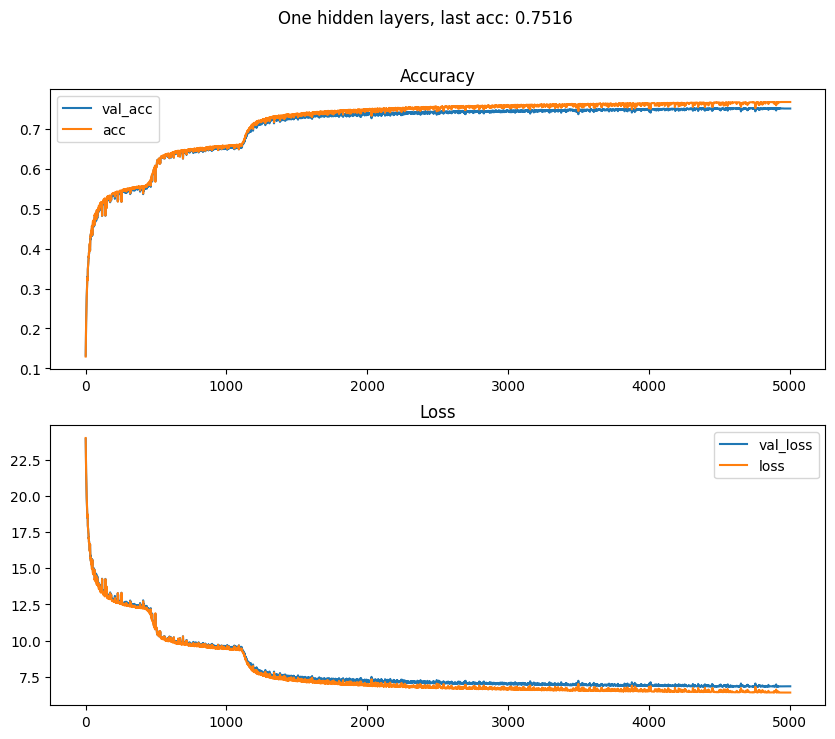

In [145]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle(f'One hidden layers, last acc: {history_leaky["val_acc"][-1]}')

ax[0].plot(history_leaky['val_acc'], label='val_acc')
ax[0].plot(history_leaky['acc'], label='acc')
ax[0].legend()
ax[0].set_title('Accuracy')
 
ax[1].plot(history_leaky['val_loss'], label='val_loss')
ax[1].plot(history_leaky['loss'], label='loss')
ax[1].legend()
ax[1].set_title('Loss')

Модель показала себе гірше ніж усі інші із одним скритим шаром, самі криві навчання виглядають досить непогано, але тренування завершилося через те, що покращення у моделі не має, тому мабуть це максимум який нам може дати ця модель, що дуже цікаво, я гадав, що ми отримаємо результати майже такі ж самі

## ELU

In [146]:
class ELUTwoLayersModel(tf.Module):
  def __init__(self, in_features, out_features, name=None):
    super().__init__(name=name)
    self.w0 = tf.Variable(tf.random.normal([in_features, 100]), name='w0')
    self.b0 = tf.Variable(tf.random.normal([1]), name='b0')

    self.w1 = tf.Variable(tf.random.normal([100, 50]), name='w1')
    self.b1 = tf.Variable(tf.random.normal([1]), name='b1')

    self.w2 = tf.Variable(tf.random.normal([50, 15]), name='w2')
    self.b2 = tf.Variable(tf.random.normal([1]), name='b2')

    self.w3 = tf.Variable(tf.random.normal([15, 10]), name='w3')
    self.b3 = tf.Variable(tf.random.normal([1]), name='b3')

  def __call__(self, x0):
    x1 = tf.nn.elu(tf.matmul(x0, self.w0) + self.b0)
    x2 = tf.nn.elu(tf.matmul(x1, self.w1) + self.b1)
    x3 = tf.nn.elu(tf.matmul(x2, self.w2) + self.b2)
    return tf.nn.softmax(tf.matmul(x3, self.w3) + self.b3)

In [148]:
%%time

elu_model = ELUTwoLayersModel(X_train.shape[1], y_train.shape[1], name='no_layers')

print(f"Starting loss: {loss(y_train, elu_model(X_train)).numpy()}")

history_elu = training_loop(elu_model, X_train, y_train, layers=1, lrng_rate=0.1)

Starting loss: 23.80303192138672
Epoch 0: Loss = 23.1266 Val Loss = 23.0004, Val acc = 0.1661 

Epoch 100: Loss = 11.6560 Val Loss = 11.6006, Val acc = 0.5786 

Epoch 200: Loss = 7.6308 Val Loss = 7.8206, Val acc = 0.7158 

Epoch 300: Loss = 6.2574 Val Loss = 6.4701, Val acc = 0.7648 

Epoch 400: Loss = 5.6629 Val Loss = 5.8452, Val acc = 0.7871 

Epoch 500: Loss = 5.3274 Val Loss = 5.5307, Val acc = 0.7988 

Epoch 600: Loss = 5.2545 Val Loss = 5.4855, Val acc = 0.7997 

Epoch 700: Loss = 3.7519 Val Loss = 3.9636, Val acc = 0.8548 

Epoch 800: Loss = 3.4163 Val Loss = 3.6272, Val acc = 0.867 

Epoch 900: Loss = 2.9277 Val Loss = 3.2637, Val acc = 0.8805 

Epoch 1000: Loss = 2.6938 Val Loss = 3.0636, Val acc = 0.8875 

Epoch 1100: Loss = 2.5693 Val Loss = 2.9198, Val acc = 0.8931 

Epoch 1200: Loss = 2.4257 Val Loss = 2.8155, Val acc = 0.8967 

Epoch 1300: Loss = 2.3213 Val Loss = 2.7248, Val acc = 0.8999 

Epoch 1400: Loss = 2.2580 Val Loss = 2.6746, Val acc = 0.9018 

Epoch 1500: Loss

Text(0.5, 1.0, 'Loss')

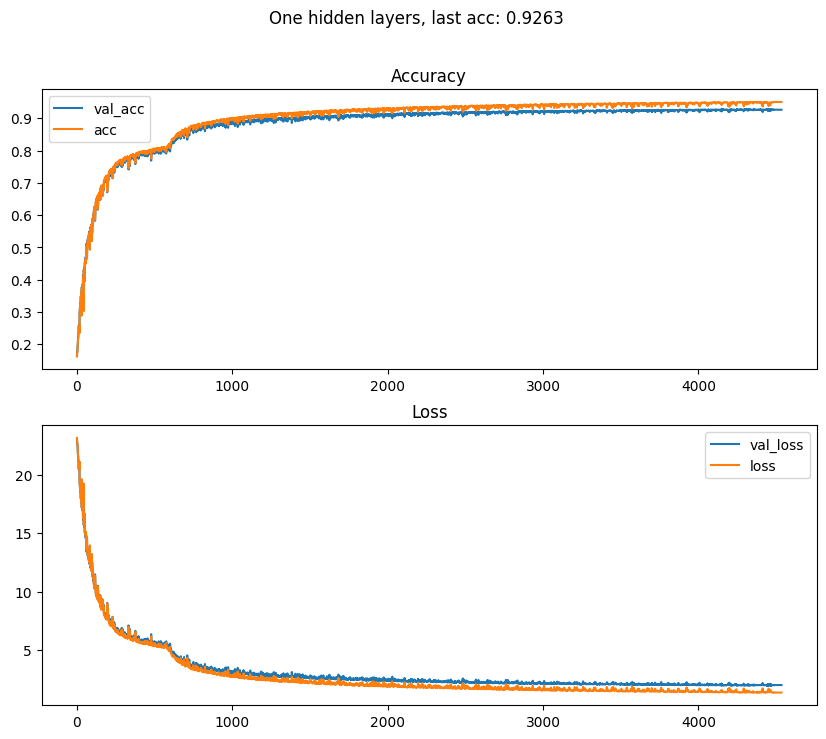

In [149]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle(f'One hidden layers, last acc: {history_elu["val_acc"][-1]}')

ax[0].plot(history_elu['val_acc'], label='val_acc')
ax[0].plot(history_elu['acc'], label='acc')
ax[0].legend()
ax[0].set_title('Accuracy')
 
ax[1].plot(history_elu['val_loss'], label='val_loss')
ax[1].plot(history_elu['loss'], label='loss')
ax[1].legend()
ax[1].set_title('Loss')

Ця функція активації показала себе найкраще і ми отримали модель на другому місці по метрикам, криві навчання виглядають дуже гарно, модель також закінчила навчання через те, що функція втрат перестала зменшуватися, та ми отримали дуже гарний результат точності 

### Порівняння усіх функцій

Text(0.5, 1.0, 'Validation loss')

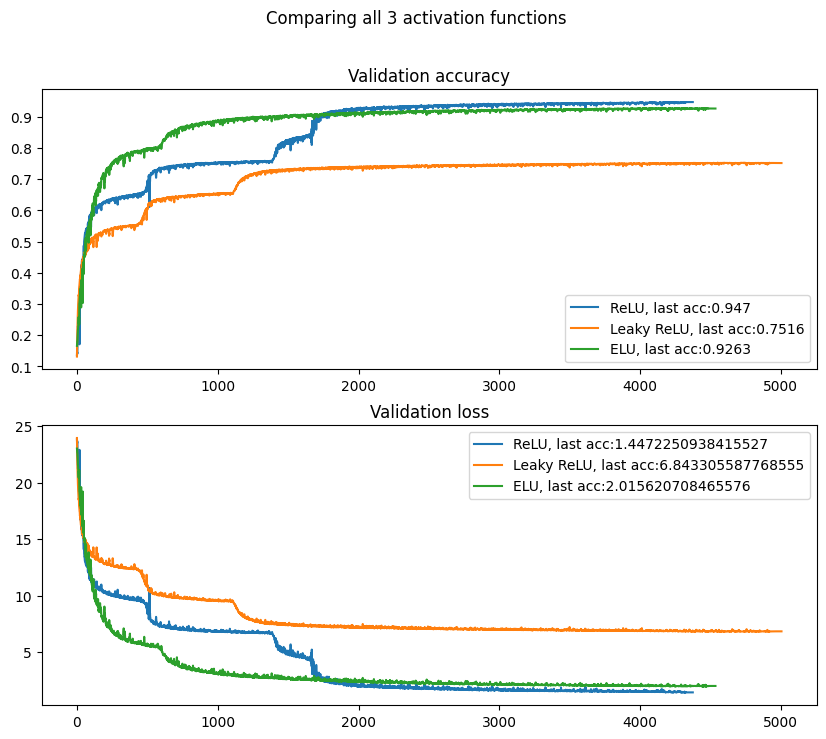

In [151]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle(f'Comparing all 3 activation functions')

ax[0].plot(history_two_hid['val_acc'], label=f'ReLU, last acc:{history_two_hid["val_acc"][-1]}')
ax[0].plot(history_leaky['val_acc'], label=f'Leaky ReLU, last acc:{history_leaky["val_acc"][-1]}')
ax[0].plot(history_elu['val_acc'], label=f'ELU, last acc:{history_elu["val_acc"][-1]}')
ax[0].legend()
ax[0].set_title('Validation accuracy')

ax[1].plot(history_two_hid['val_loss'], label=f'ReLU, last acc:{history_two_hid["val_loss"][-1]}')
ax[1].plot(history_leaky['val_loss'], label=f'Leaky ReLU, last acc:{history_leaky["val_loss"][-1]}')
ax[1].plot(history_elu['val_loss'], label=f'ELU, last acc:{history_elu["val_loss"][-1]}')
ax[1].legend()
ax[1].set_title('Validation loss')

Ми отримали дуже цікавий результат, найкраще себе показало ReLU, що не було великим сюрпризом, адже цю функцію активації майже завжди використовують за замовчуванням, мене вразив результат Leaky ReLU, я справді гадав, що ми отримаємо майже той же самий результат, що і для звичайної версії, а ELU отримала почесне друге місце по результатам метрик (як і для функцій активації, так і серед усіх моделей)

Я багато де читав, що функції активації дуже рідко впливають на те як модель себе показує і це потрібно налаштовувати у останню чергу (якщо і потрібно загалом, а не залишати ReLU), мабуть це зазвичай так, але тут ми отримали доказ того, що функція активації може дуже сильно вплинути на результат

Дуже помітної різниці у швидкості навчання немає, майже усе навчалося за 2 хвилини (нажаль для ReLU я не додав таймеру, тому я орієнтувався по числу поряд із запуском блоку коду, а вас попрошу повірити мені на слово), вважаючи те, що вони мали різну кількість епох, то я б сказав, що час навчання у них майже однаковий

Щодо часу надання прогнозу мережею, то тут я не можу сказати, усі моделі давали результати дуже швидко (десь 100 μsec), іноді я отримував інші значення часу (чому саме - не знаю), тому я вирішив не проводити дослідження, з великою таблицею де обирав би середнє значення для кожної моделі

# Давайте подивимося на те які зображення наша найкраща модель не правильно класифікувала

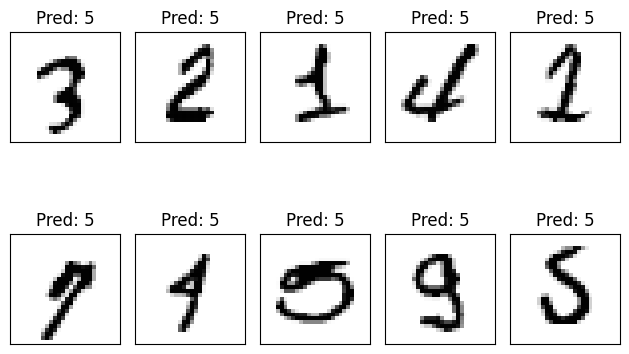

In [189]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()

pred_labels = tf.argmax(two_layers_model(X_test), axis=1)
misclassified_indices = np.where(pred_labels != y_test_not_encoded)[0]

for i in range(10):

    misclassified_image = X_test.numpy()[misclassified_indices[i]].reshape(28, 28)

    ax[i].imshow(misclassified_image, cmap='Greys')  
    ax[i].set_title(f"Pred: {pred_labels[index]}")

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

Результат дуже цікавий, я гадав, що тут будуть числа які дуже схожі на неправильну класифікацію, але ні, хіба що можна причепитися до останньго, та третього числа у другому рядку, тут зовсім не зрозуміло що це, якщо не 5

# Висновки

Найкращою моделю була двошарова нейрона мережа з функцією активації - ReLU, на другому місці була двошарова з ELU, і на третьому одношарова з краще підібраним значенням швидкості навчання, це було досить очікуванно, адже нелінійність мережі яку ми досягаємо додаванням шарів з функціями активації може творити дива, але не у цей раз, звичайна модель, що не мала скритих шарів спочатку показала себе краще ніж одношарова, для того щоб усе стало на свої місця нам потрібно було підібрати параметр швидкості навчання, загалом майже усі моделі показали себе гарно, окрім двошарової Leaky ReLU

Згорткова мережа показала би себе тут набагато краще, але усе рівно результат у ~0.95 точності на тестовому датасеті для звичайної двошарової моделі це дуже високо, та як на мене дуже несподівано

У цій лабораторній роботі я навчився створювати багатошарову нейронну мережу прямого розповсюдження за допомогою бiблiотеки TensorFlow, створювати власний клас, використовуючи tf.Module, реалiзувувати алгоритм зворотного розповсюдження помилки (back propagation), налаштувовувати ваги побудованої моделi реалiзованим алгоритмом, використанню багатошарової нейронної мережі прямого розповсюдження для класифiкацiї зображень типу MNIST.